In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
%matplotlib inline

In [2]:
DATA_URL="https://data.sdss.org/sas/dr14/eboss/lss/catalogs/"
local_file="data_DR14_QSO_N.fits"

In [3]:
download_if_missing=True

data_home="./"
archive_file = os.path.join(data_home,local_file)
if not os.path.exists(archive_file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL, data_home))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("File already exist")


File already exist


In [4]:
catalog_qso=Table.read('data_DR14_QSO_N.fits')

In [5]:
print(catalog_qso.columns)

<TableColumns names=('RA','DEC','EBOSS_TARGET0','EBOSS_TARGET1','EBOSS_TARGET_ID','RUN','RERUN','CAMCOL','FIELD','ID','CHUNK','IPOLY','ISECT','TILE','SPECTILE','MODELFLUX','FIBER2FLUX','MODELMAG','R_DEV','MODELFLUX_IVAR','IMAGE_DEPTH','EXTINCTION','W1_MAG','W1_MAG_ERR','ZWARNING_NOQSO','ZWARNING','CLASS_NOQSO','PSF_FWHM','AIRMASS','SKY_FLUX','EB_MINUS_V','IMATCH','Z','Z_VI','Z_PL','Z_PL_ERR','Z_PCA','Z_PCA_ERR','Z_MGII','Z_MGII_ERR','WEIGHT_FKP','WEIGHT_CP','WEIGHT_NOZ','WEIGHT_SYSTOT','NZ','COMP','PLATE','FIBERID','MJD','CLASS','BOSS_TARGET1','WEIGHT_FOCAL')>


In [6]:
print(catalog_qso.info)

<Table length=116866>
      name       dtype  shape n_bad
--------------- ------- ----- -----
             RA float64           0
            DEC float64           0
  EBOSS_TARGET0   int64           0
  EBOSS_TARGET1   int64           0
EBOSS_TARGET_ID   int64           0
            RUN   int32           0
          RERUN    str3           0
         CAMCOL   int32           0
          FIELD   int32           0
             ID   int32           0
          CHUNK   int32           0
          IPOLY   int32           0
          ISECT   int32           0
           TILE   int16  (3,)     0
       SPECTILE   int32           0
      MODELFLUX float32  (5,)     0
     FIBER2FLUX float32  (5,)     0
       MODELMAG float64  (5,)     0
          R_DEV float32  (5,)     0
 MODELFLUX_IVAR float32  (5,)     0
    IMAGE_DEPTH float32  (5,)     0
     EXTINCTION float32  (5,)     0
         W1_MAG float64         107
     W1_MAG_ERR float64         107
 ZWARNING_NOQSO float64           0
      

/Users/mariana/anaconda/lib/python3.5/site-packages/astropy/table/column.py:263: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)


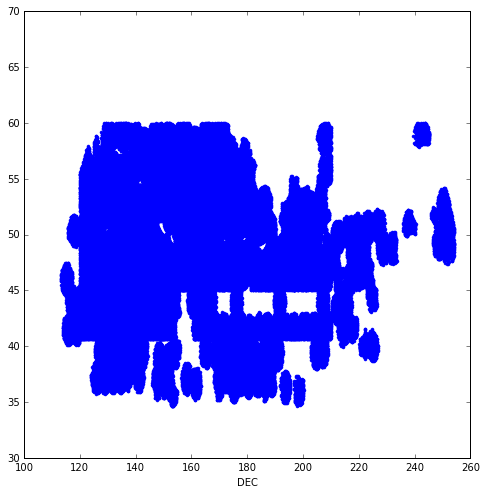

In [7]:
plt.figure(figsize=(8,8))
plt.plot(catalog_qso['RA'], catalog_qso['DEC'], '.')
plt.xlim(100, 260)
plt.ylim(30, 70)
plt.xlabel('RA')
plt.xlabel('DEC')

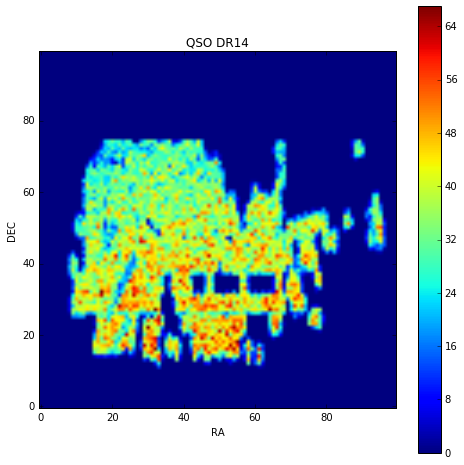

In [8]:
#xedges=np.linspace()
#yedges=np.linspace() 
#bins=(xedges, yedges)
den_qso, ra_bins, dec_bins = np.histogram2d(catalog_qso['RA'], catalog_qso['DEC'],range=[[100, 260], [30, 70]], bins=[100,100])

plt.figure(figsize=(8,8))
plt.imshow(den_qso.T, origin='lower')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('QSO DR14')
plt.colorbar()
plt.show()

In [9]:
selection=(catalog_qso['RA']>150) & (catalog_qso['RA']<160) & (catalog_qso['DEC']>10) &(catalog_qso['DEC']<20)

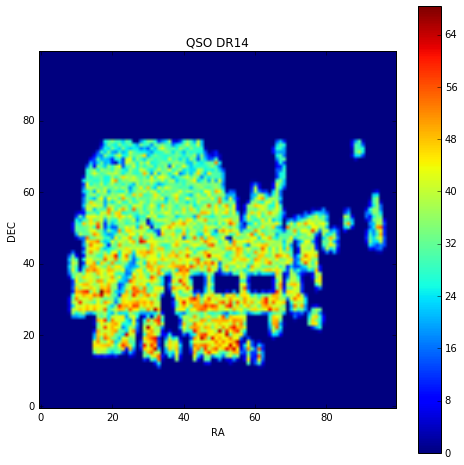

In [10]:
den_qso_weighted, ra_bins, dec_bins = np.histogram2d(catalog_qso['RA'], catalog_qso['DEC'],range=[[100, 260], [30, 70]], bins=[100,100],normed=False, weights=catalog_qso['WEIGHT_SYSTOT'])

plt.figure(figsize=(8,8))
plt.imshow(den_qso_weighted.T, origin='lower')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('QSO DR14')
plt.colorbar()
plt.show()

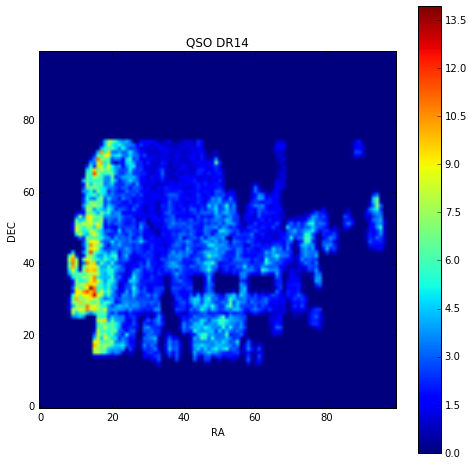

In [11]:
den_qso_weighted, ra_bins, dec_bins = np.histogram2d(catalog_qso['RA'], catalog_qso['DEC'],range=[[100, 260], [30, 70]], bins=[100,100],normed=False, weights=catalog_qso['EXTINCTION'][:,0])

plt.figure(figsize=(8,8))
plt.imshow(den_qso_weighted.T, origin='lower')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('QSO DR14')
plt.colorbar()
plt.show()

In [12]:
targets_eboss= (catalog_qso['BOSS_TARGET1']==0)
cat_eboss=catalog_qso[targets_eboss]
targets_boss= (catalog_qso['BOSS_TARGET1']==1)
cat_boss=catalog_qso[targets_boss]
print(len(cat_eboss['RA']))
print(len(cat_boss['RA']))


78587
0


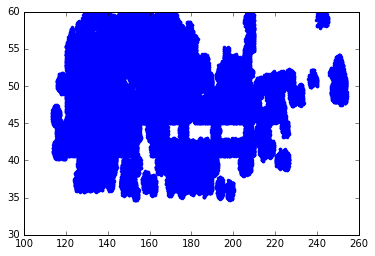

In [13]:
plt.plot(cat_eboss['RA'],cat_eboss['DEC'], '.')

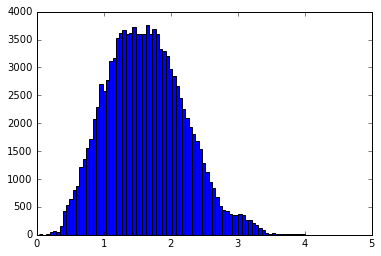

In [14]:
plt.hist(catalog_qso['Z'], bins=100)
plt.show()

In [15]:
DATA_URL="https://data.sdss.org/sas/dr14/eboss/lss/catalogs/"
local_file="data_DR14_LRG_N.fits"

In [16]:
download_if_missing=True

data_home="./"
archive_file = os.path.join(data_home,local_file)
if not os.path.exists(archive_file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL, data_home))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("File already exist")


File already exist


In [17]:
catalog_lrg=Table.read('data_DR14_LRG_N.fits')

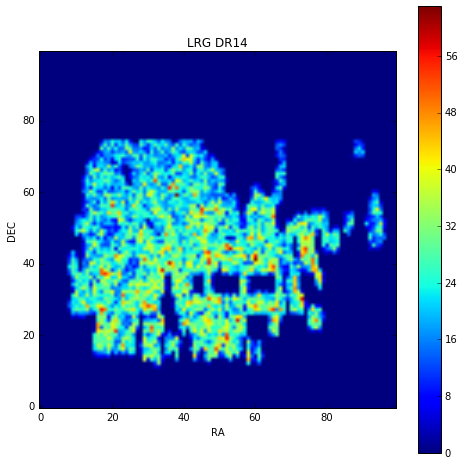

In [18]:
den_lrg, ra_bins, dec_bins = np.histogram2d(catalog_lrg['RA'], catalog_lrg['DEC'],range=[[100, 260], [30, 70]], bins=[100,100])

plt.figure(figsize=(8,8))
plt.imshow(den_lrg.T, origin='lower')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('LRG DR14')
plt.colorbar()
plt.show()

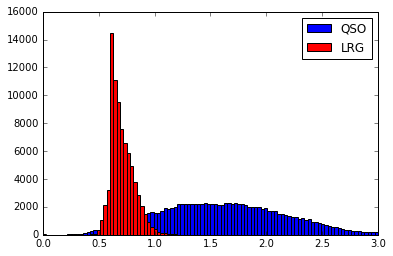

In [19]:
plt.hist(catalog_qso['Z'], bins=100, color='b', range=(0,3), label='QSO')
plt.hist(catalog_lrg['Z'], bins=100, color='r', range=(0,3), label='LRG')
plt.legend()
plt.show()

In [20]:
#print(catalog_lrg['PLATE'])
one_plate_qso=(catalog_qso['PLATE']==8857)
one_plate_lrg=(catalog_lrg['PLATE']==8857)

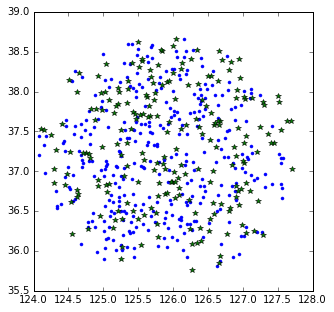

In [21]:
plt.figure(figsize=(5,5))
qso_in_plate=catalog_qso[one_plate_qso]
lrg_in_plate=catalog_lrg[one_plate_lrg]
plt.plot(qso_in_plate['RA'], qso_in_plate['DEC'], '.')
plt.plot(lrg_in_plate['RA'], lrg_in_plate['DEC'], '*')

In [22]:
few_plate_qso=(catalog_qso['PLATE']>=8857)&(catalog_qso['PLATE']<8860)
few_plate_lrg=(catalog_lrg['PLATE']>=8857)&(catalog_lrg['PLATE']<8860)

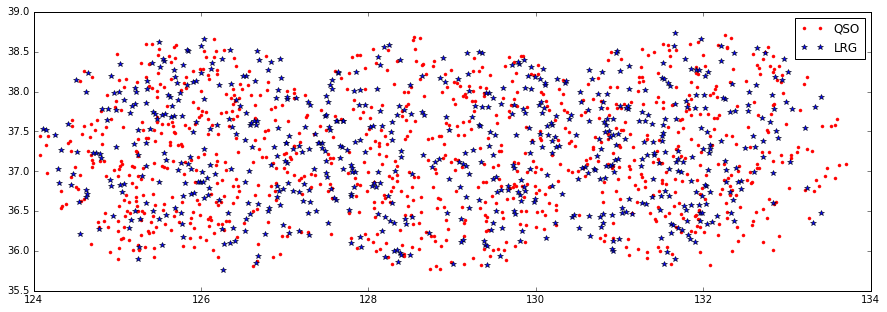

In [23]:
plt.figure(figsize=(15,5))
qso_in_plate=catalog_qso[few_plate_qso]
lrg_in_plate=catalog_lrg[few_plate_lrg]
plt.plot(qso_in_plate['RA'], qso_in_plate['DEC'], '.', color='r', label='QSO')
plt.plot(lrg_in_plate['RA'], lrg_in_plate['DEC'], '*', label='LRG')
plt.legend()

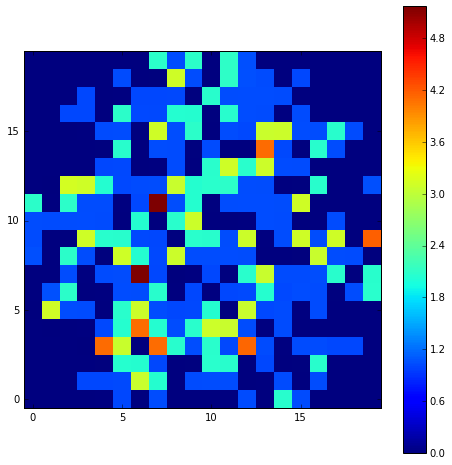

In [24]:
qso_in_plate=catalog_qso[one_plate_qso]
lrg_in_plate=catalog_lrg[one_plate_lrg]
den_qso_weighted_focal, ra_bins, dec_bins = np.histogram2d(qso_in_plate['RA'], qso_in_plate['DEC'],bins=(20,20), weights=qso_in_plate['WEIGHT_FOCAL'])
plt.figure(figsize=(8,8))
plt.imshow(den_qso_weighted_focal.T, origin='lower', interpolation='NONE')
plt.colorbar()
plt.show()

In [34]:
DATA_URL="https://data.sdss.org/sas/dr14/eboss/lss/catalogs/"
local_file="mask_DR14_LRG_S.ply"

In [35]:
download_if_missing=True

data_home="./"
archive_file = os.path.join(data_home,local_file)
if not os.path.exists(archive_file):
        print("downloading DR14 lrg dataset from %s to %s"
              % (DATA_URL, data_home))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file "+local_file)
else:
    print("File already exist")

downloading DR14 lrg dataset from https://data.sdss.org/sas/dr14/eboss/lss/catalogs/ to ./
Downloaded filemask_DR14_LRG_S.ply


In [27]:
#import sys
#!{sys.executable} -m pip install pymangle --upgrade

 

 
#

  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/8e/98/6dd8fef9731ae1531a9eb58e88d6c82e3a74129b985f7e9296bdbc5b412b/pymangle-0.9.1.tar.gz
  Running setup.py bdist_wheel for pymangle ... - \ | / - \ | / - \ done
  Stored in directory: /Users/mariana/Library/Caches/pip/wheels/2c/97/0a/d1b7d8e92bc9b41d69d1663d2a0012906e8ecf0b08c21af52b
Successfully built pymangle
You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
#import numpy as np

#import pymangle

In [39]:
#m=pymangle.Mangle('mask_DR14_LRG_S.ply')
#ra_rand, dec_rand = m.genrand(1000)

#import mangle
#m=mangle.Mangle("mask_DR14_LRG_N.ply")
#ra_rand=np.random.rand(10000)*360
#dec_rand=np.random.rand(10000)*90
#plt.plot(ra_rand, dec_rand, '.',markersize=0.5)
#in_mask=m.contains(ra_rand,dec_rand)
#print(in_mask)

#plt.plot(ra_rand[in_mask],dec_rand[in_mask], '*', markersize=5, color='r')
#